In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
countries = os.listdir('data')

In [3]:
seasons = ['2021_2022.csv', '2022_2023.csv', '2023_2024.csv']

In [4]:
considered_features = [
    'Div'
    , 'Date'
    , 'Time'
    , 'HomeTeam'
    , 'AwayTeam'
    , 'FTHG'
    , 'FTAG'
    , 'FTR'
    , 'HTHG'
    , 'HTAG'
    , 'HTR'
    , 'HS'
    , 'AS'
    , 'HST'
    , 'AST'
    , 'HF'
    , 'AF'
    , 'HC'
    , 'AC'
    , 'HY'
    , 'AY'
    , 'HR'
    , 'AR']

In [6]:
def same_league_concat(country):
    concatenated = pd.DataFrame()
    for file in seasons:
        season = pd.read_csv(f'data/{country}/{file}')
        season = season[considered_features]
        concatenated = pd.concat([concatenated,season])
    return  concatenated
def global_dataset(countries):
    gloabal = pd.DataFrame()
    for country in countries:
        concat = same_league_concat(country)
        gloabal = pd.concat([gloabal,concat])
    return gloabal

### global_concatenated is a dataset containing 9019 matches from 10 different leagues from 2021/2022 season until current day.

In [7]:
global_csv = global_dataset(countries)
global_csv.to_csv('global_concatenated.csv')

In [182]:
global_csv.shape

(9019, 23)

In [11]:
global_csv['Div'].value_counts()

I2     1060
F2     1049
I1     1049
T1     1021
F1      994
B1      852
N1      846
P1      845
G1      668
SC0     635
Name: Div, dtype: int64

In [184]:
country_csv = {}
for country in countries:
    concatenated = same_league_concat(country)
    concatenated.to_csv(f'data/{country}/concatenated.csv')
    country_csv[country] = concatenated

#### We have some missing rows

<AxesSubplot:>

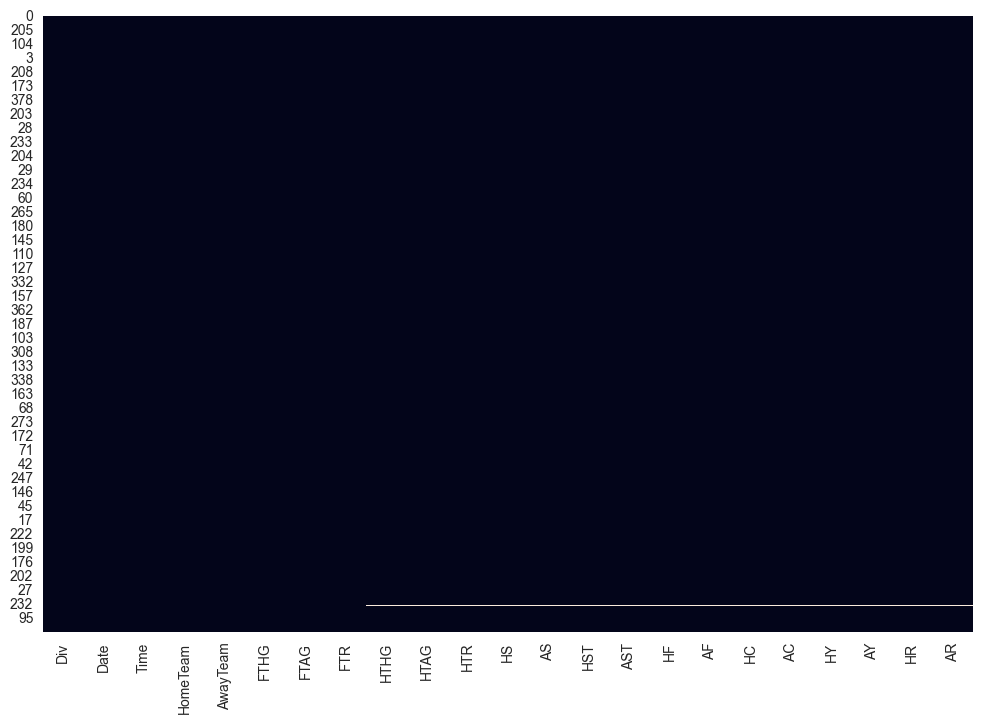

In [185]:
plt.figure(figsize=(12,8))
sns.heatmap(global_csv.isna(),cbar=False)

#### 35 invalid rows : 5 from the belgium league , 29 from the turkish league , 1 from france league 2
#### The missing values in the turkish league are coming from only 2 teams Hatayspor and Gaziantep

In [186]:
missing_rows = global_csv[global_csv.isna().any(axis=1)]
missing_rows

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
8,B1,27/07/2021,17:30,Beerschot VA,Cercle Brugge,0,1,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0
188,B1,15/01/2022,15:15,Oud-Heverlee Leuven,Mechelen,5,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,B1,10/04/2022,17:30,St. Gilloise,Beerschot VA,5,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,B1,23/10/2022,17:30,Standard,Anderlecht,5,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,B1,12/11/2022,19:45,Charleroi,Mechelen,0,5,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,F2,22/04/2022,20:00,Nancy,Quevilly Rouen,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,T1,25/02/2023,13:00,Umraniyespor,Gaziantep,3,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,T1,05/03/2023,13:00,Ad. Demirspor,Hatayspor,3,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,T1,05/03/2023,13:00,Gaziantep,Galatasaray,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,T1,12/03/2023,10:30,Hatayspor,Konyaspor,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
